## Fechas y Horas

Este es un caso especial de variables categóricas en el cual en vez de tener los grupos o categorías tradicionales, como color (azul, rojo), o ciudad (London, Manchester), las categorías son fechas y/o horas. Por ejemplo, fecha de nacimiento ('29-08-1987', '12-01-2012'), o fecha de aplicación ('2016-Dic', '2013-Marzo').

Las variables 'datetime' por su nombre en inglés, pueden tomar valores ya sea de fechas, de horas o de fechas y horas a la vez.

Normalmente, no utilizamos este tipo de variables en su formato de fecha y hora porque:

- Las variables con fechas tienen un gran número de diferentes categorías
- Una gran cantidad de información valiosa puede ser extraída de las variables 'datetime' si se pre-procesan correctamente

Además, usualmente con este tipo de variables, puede suceder que las fechas que se usaron en los datos para entrenar un modelo predictivo, no estén presentes en los datos que se usan para validar el modelo. De hecho, las variables pueden contener fechas en el futuro, con respecto a las fechas que se usaron para entrenar el modelo. Por lo tanto, el modelo predictivo no sabría qué hacer con ellas, porque nunca estuvieron presentes durante el modelamiento.

**Se cubrirán diferentes formas de pre-procesamiento/ingeniería para las variables 'datetime' en la sección "Ingeniería de variables datetime" más adelante en el curso**

=============================================================================

## En este demo: Préstamos Peer-to-peer (P2P)

En este demo, usaremos datos de la compañía financiera especializada en préstamos peer-to-peer llamada **Lending Club** para examinar variables categóricas.

- Para descargar los datos, por favor referirse a la sección de **Datos** de la **Sección 1** del curso.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Carguemos los datos con solo unas pocas columnas.

# Definición de variables:
#-------------------------
# loan_amnt: Valor del préstamo
# purpose: propósito/intención de uso del préstamo 
# grade: nivel de riesgo asignado al prestamista
# issue_d: fecha en la cual el préstamo fué aprobado
# last_pymnt_d: fecha del último pago 

use_cols = ['loan_amnt', 'grade', 'purpose', 'issue_d', 'last_pymnt_d']

data = pd.read_csv('../loan.csv', usecols=use_cols)

data.head()

,loan_amnt,grade,issue_d,purpose,last_pymnt_d
0,5000.0,B,Dec-2011,credit_card,Jan-2015
1,2500.0,C,Dec-2011,car,Apr-2013
2,2400.0,C,Dec-2011,small_business,Jun-2014
3,10000.0,C,Dec-2011,other,Jan-2015
4,3000.0,B,Dec-2011,other,Jan-2016


In [3]:
# pandas asigna el tipo 'object' cuando lee formatos de fechas
# de un archivo csv y considera a los valores como cadenas de caracteres.

data.dtypes

loan_amnt       float64
grade            object
issue_d          object
purpose          object
last_pymnt_d     object
dtype: object

Ambas issue_d y last_pymnt_d son convertidas a objetos ('object'). Por lo tanto, pandas las manipula como cadenas de caracteres o variables categóricas. 

Para que pandas procese estas variables como fechas, es necesario convertirlas a formato datetime. 

In [4]:
# Convirtamos estas variables de su formato actual a formato 'datetime'
# esto nos permitirá hacer un análisis mas avanzado 

data['issue_dt'] = pd.to_datetime(data.issue_d)
data['last_pymnt_dt'] = pd.to_datetime(data.last_pymnt_d)

data[['issue_d', 'issue_dt', 'last_pymnt_d', 'last_pymnt_dt']].head()

,issue_d,issue_dt,last_pymnt_d,last_pymnt_dt
0,Dec-2011,2011-12-01,Jan-2015,2015-01-01
1,Dec-2011,2011-12-01,Apr-2013,2013-04-01
2,Dec-2011,2011-12-01,Jun-2014,2014-06-01
3,Dec-2011,2011-12-01,Jan-2015,2015-01-01
4,Dec-2011,2011-12-01,Jan-2016,2016-01-01


Text(0, 0.5, 'Cantidad Desembolsada  (USD)')

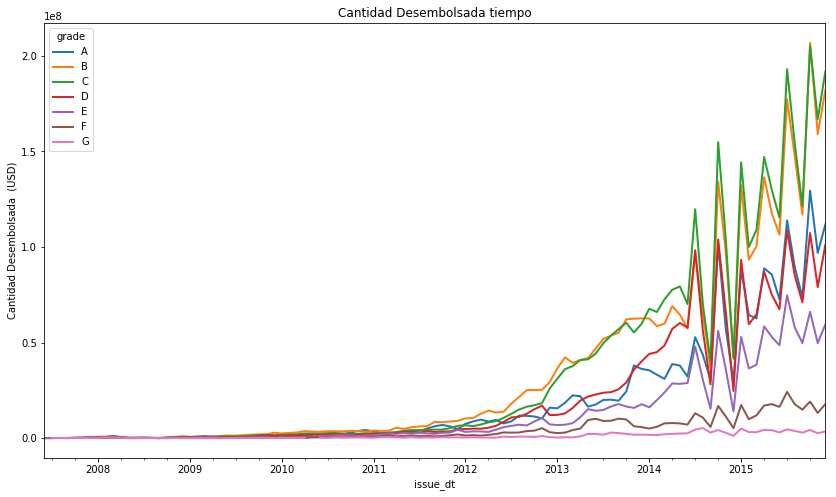

In [5]:
# Miremos cuanto dinero Lending Club ha desembolsado en préstamos
# en los últimos años para los diferentes niveles de riesgo
# (variable 'grade')

fig = data.groupby(['issue_dt', 'grade'])['loan_amnt'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Cantidad Desembolsada tiempo')
fig.set_ylabel('Cantidad Desembolsada  (USD)')

Lending Club parece haber incrementado la cantidad de dinero que otorga en préstamos desde el 2013, una tendencia que parece continuar. Además, podemos ver que la mayoría de préstamos están son desembolsados en las categorías de riesgo C y B ('grade').

La categoría ('grade') 'A' es la de menor riesgo, los prestamistas en este grupo probablemente pagarán toda su deuda, ya que por lo general están en una mejor situación financiera. En esta categoría, las tasas de interés son más bajas.

Categorías E, F y G  representan mayor riesgo. Usualmente los prestamistas están en una situación financiera más delicada o no tienen suficiente historia crediticia para hacer una evaluación fiable. Típicamente, se les cobran tasas de interés más altas, ya que la entidad financiera (y sus inversores) están tomando un riesgo mayor al otorgales el crédito.


**Esto es todo por este demo, esperamos lo hayan disfrutado y nos vemos en el siguiente. **